DATA PROCESSING WITH APACHE SPARK

CODTECH IT SOLUTIONS

TASK TWO:
Perform data processing and analysis using Apache Spark. This
project introduces you to big data processing and analytics.
Set up Apache Spark in a local or cluster environment. Write
Spark jobs in Scala, Python (PySpark), or Java. Process and
analyze data from different sources (e.g., CSV, JSON).


In [4]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=ddf49cba423c4447bfada6079cded66d4f96e55d61074e915fdfa55e6f13008a
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [5]:
#importing Nacessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import sum, avg, min, max


In [6]:

# Initialize a Spark session
spark = SparkSession.builder.appName("SparkDataProcessing").getOrCreate()


In [8]:
# Define the path to your CSV file
# load the csv file into colab

csv_file_path = "/content/covid.csv"

# Read the CSV file into a DataFrame
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)


In [9]:
# Show the first few rows of the DataFrame
df.show()



+--------+--------+----------+-----------+---------+------------+----------+-----------------------+---------------------+------------------------+----------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+-----------+----------------+----------+------------------+----------+-------------+-------------+--------------+---------------+--------------+-------------------+--------------+------------+----------------------+----------------------+
|iso_code|location|      date|total_cases|new_cases|total_deaths|new_deaths|total_cases_per_million|new_cases_per_million|total_deaths_per_million|new_deaths_per_million|total_tests|new_tests|total_tests_per_thousand|new_tests_per_thousand|new_tests_smoothed|new_tests_smoothed_per_thousand|tests_units|stringency_index|population|population_density|median_age|aged_65_older|aged_70_older|gdp_per_capita|extreme_poverty|cvd_death_rate|diabetes_prevalence|female_smokers|

In [10]:
df.printSchema()

root
 |-- iso_code: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: date (nullable = true)
 |-- total_cases: integer (nullable = true)
 |-- new_cases: integer (nullable = true)
 |-- total_deaths: integer (nullable = true)
 |-- new_deaths: integer (nullable = true)
 |-- total_cases_per_million: double (nullable = true)
 |-- new_cases_per_million: double (nullable = true)
 |-- total_deaths_per_million: double (nullable = true)
 |-- new_deaths_per_million: double (nullable = true)
 |-- total_tests: double (nullable = true)
 |-- new_tests: double (nullable = true)
 |-- total_tests_per_thousand: double (nullable = true)
 |-- new_tests_per_thousand: double (nullable = true)
 |-- new_tests_smoothed: double (nullable = true)
 |-- new_tests_smoothed_per_thousand: double (nullable = true)
 |-- tests_units: string (nullable = true)
 |-- stringency_index: double (nullable = true)
 |-- population: double (nullable = true)
 |-- population_density: double (nullable = true)

In [11]:

for col_name in df.columns:
    null_counts = df.filter(col(f"`{col_name}`").isNull()).count()
    print(f"Number of null Values in column '{col_name}': {null_counts}")

Number of null Values in column 'iso_code': 64
Number of null Values in column 'location': 0
Number of null Values in column 'date': 0
Number of null Values in column 'total_cases': 0
Number of null Values in column 'new_cases': 0
Number of null Values in column 'total_deaths': 0
Number of null Values in column 'new_deaths': 0
Number of null Values in column 'total_cases_per_million': 377
Number of null Values in column 'new_cases_per_million': 377
Number of null Values in column 'total_deaths_per_million': 377
Number of null Values in column 'new_deaths_per_million': 377
Number of null Values in column 'total_tests': 14332
Number of null Values in column 'new_tests': 14904
Number of null Values in column 'total_tests_per_thousand': 14332
Number of null Values in column 'new_tests_per_thousand': 14904
Number of null Values in column 'new_tests_smoothed': 13866
Number of null Values in column 'new_tests_smoothed_per_thousand': 13866
Number of null Values in column 'tests_units': 13267
N

In [12]:
df = df.na.drop()


In [13]:

for col_name in df.columns:
    null_counts = df.filter(col(f"`{col_name}`").isNull()).count()
    print(f"Number of null Values in column '{col_name}': {null_counts}")

Number of null Values in column 'iso_code': 0
Number of null Values in column 'location': 0
Number of null Values in column 'date': 0
Number of null Values in column 'total_cases': 0
Number of null Values in column 'new_cases': 0
Number of null Values in column 'total_deaths': 0
Number of null Values in column 'new_deaths': 0
Number of null Values in column 'total_cases_per_million': 0
Number of null Values in column 'new_cases_per_million': 0
Number of null Values in column 'total_deaths_per_million': 0
Number of null Values in column 'new_deaths_per_million': 0
Number of null Values in column 'total_tests': 0
Number of null Values in column 'new_tests': 0
Number of null Values in column 'total_tests_per_thousand': 0
Number of null Values in column 'new_tests_per_thousand': 0
Number of null Values in column 'new_tests_smoothed': 0
Number of null Values in column 'new_tests_smoothed_per_thousand': 0
Number of null Values in column 'tests_units': 0
Number of null Values in column 'strin

In [14]:
df.show()

+--------+----------+----------+-----------+---------+------------+----------+-----------------------+---------------------+------------------------+----------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+--------------+----------------+------------+------------------+----------+-------------+-------------+--------------+---------------+--------------+-------------------+--------------+------------+----------------------+----------------------+
|iso_code|  location|      date|total_cases|new_cases|total_deaths|new_deaths|total_cases_per_million|new_cases_per_million|total_deaths_per_million|new_deaths_per_million|total_tests|new_tests|total_tests_per_thousand|new_tests_per_thousand|new_tests_smoothed|new_tests_smoothed_per_thousand|   tests_units|stringency_index|  population|population_density|median_age|aged_65_older|aged_70_older|gdp_per_capita|extreme_poverty|cvd_death_rate|diabetes_prevalence|f

In [16]:
#Applying aggrigationg functions
df.groupby("location").sum("total_cases").show()
df.groupby("location").avg("total_cases").show()
df.groupby("location").min("total_cases").show()
df.groupby("location").max("total_cases").show()

+------------+----------------+
|    location|sum(total_cases)|
+------------+----------------+
|    Paraguay|           18280|
|       Ghana|           28497|
|     Myanmar|            5124|
|       India|         2026646|
|  Bangladesh|          273152|
|      Mexico|         1033054|
|    Zimbabwe|             169|
|   Indonesia|          419875|
|     Tunisia|           29159|
|      Uganda|            2982|
|    Ethiopia|            2988|
|       Kenya|           16846|
|       Nepal|            2290|
|  Costa Rica|           36772|
|  Kazakhstan|          154246|
| El Salvador|           18855|
|South Africa|          261956|
|    Colombia|          246959|
|    Pakistan|          819976|
|     Vietnam|            3377|
+------------+----------------+

+------------+------------------+
|    location|  avg(total_cases)|
+------------+------------------+
|    Paraguay| 268.8235294117647|
|       Ghana|            4071.0|
|     Myanmar|138.48648648648648|
|       India|  38238.60377

In [17]:
df.printSchema()

root
 |-- iso_code: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: date (nullable = true)
 |-- total_cases: integer (nullable = true)
 |-- new_cases: integer (nullable = true)
 |-- total_deaths: integer (nullable = true)
 |-- new_deaths: integer (nullable = true)
 |-- total_cases_per_million: double (nullable = true)
 |-- new_cases_per_million: double (nullable = true)
 |-- total_deaths_per_million: double (nullable = true)
 |-- new_deaths_per_million: double (nullable = true)
 |-- total_tests: double (nullable = true)
 |-- new_tests: double (nullable = true)
 |-- total_tests_per_thousand: double (nullable = true)
 |-- new_tests_per_thousand: double (nullable = true)
 |-- new_tests_smoothed: double (nullable = true)
 |-- new_tests_smoothed_per_thousand: double (nullable = true)
 |-- tests_units: string (nullable = true)
 |-- stringency_index: double (nullable = true)
 |-- population: double (nullable = true)
 |-- population_density: double (nullable = true)

In [18]:
df.describe().show()

+-------+--------+----------+------------------+-----------------+------------------+------------------+-----------------------+---------------------+------------------------+----------------------+------------------+------------------+------------------------+----------------------+------------------+-------------------------------+-------------+------------------+--------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+----------------------+----------------------+
|summary|iso_code|  location|       total_cases|        new_cases|      total_deaths|        new_deaths|total_cases_per_million|new_cases_per_million|total_deaths_per_million|new_deaths_per_million|       total_tests|         new_tests|total_tests_per_thousand|new_tests_per_thousand|new_tests_smoothed|new_tests_smoothed_per_thousand|  tests_units|  stringency_index|      

In [19]:
#df1 = df.withColumn("old", df.total_cases-df.new_cases).show()
df_with_new_column = df.withColumn("old_cases", col("total_cases") - col("new_cases"))


In [20]:
df_with_new_column.show()

+--------+----------+----------+-----------+---------+------------+----------+-----------------------+---------------------+------------------------+----------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+--------------+----------------+------------+------------------+----------+-------------+-------------+--------------+---------------+--------------+-------------------+--------------+------------+----------------------+----------------------+---------+
|iso_code|  location|      date|total_cases|new_cases|total_deaths|new_deaths|total_cases_per_million|new_cases_per_million|total_deaths_per_million|new_deaths_per_million|total_tests|new_tests|total_tests_per_thousand|new_tests_per_thousand|new_tests_smoothed|new_tests_smoothed_per_thousand|   tests_units|stringency_index|  population|population_density|median_age|aged_65_older|aged_70_older|gdp_per_capita|extreme_poverty|cvd_death_rate|diabetes_pr

In [21]:
df_with_new_column.printSchema()

root
 |-- iso_code: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: date (nullable = true)
 |-- total_cases: integer (nullable = true)
 |-- new_cases: integer (nullable = true)
 |-- total_deaths: integer (nullable = true)
 |-- new_deaths: integer (nullable = true)
 |-- total_cases_per_million: double (nullable = true)
 |-- new_cases_per_million: double (nullable = true)
 |-- total_deaths_per_million: double (nullable = true)
 |-- new_deaths_per_million: double (nullable = true)
 |-- total_tests: double (nullable = true)
 |-- new_tests: double (nullable = true)
 |-- total_tests_per_thousand: double (nullable = true)
 |-- new_tests_per_thousand: double (nullable = true)
 |-- new_tests_smoothed: double (nullable = true)
 |-- new_tests_smoothed_per_thousand: double (nullable = true)
 |-- tests_units: string (nullable = true)
 |-- stringency_index: double (nullable = true)
 |-- population: double (nullable = true)
 |-- population_density: double (nullable = true)

In [25]:
current_columns = df_with_new_column.columns
position = 4  # Zero-based index, so 5th position is index 4
columns_before = current_columns[:position]
columns_after = current_columns[position:-2]  # Exclude the last column (the new column) which is being repositioned
new_column = ["old_cases"]

# Construct the new column order
new_column_order = columns_before + new_column + columns_after

# Reorder DataFrame columns
df_reordered = df_with_new_column.select(*new_column_order)

In [26]:
df_reordered.show()


+--------+----------+----------+-----------+---------+---------+------------+----------+-----------------------+---------------------+------------------------+----------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+--------------+----------------+------------+------------------+----------+-------------+-------------+--------------+---------------+--------------+-------------------+--------------+------------+----------------------+
|iso_code|  location|      date|total_cases|old_cases|new_cases|total_deaths|new_deaths|total_cases_per_million|new_cases_per_million|total_deaths_per_million|new_deaths_per_million|total_tests|new_tests|total_tests_per_thousand|new_tests_per_thousand|new_tests_smoothed|new_tests_smoothed_per_thousand|   tests_units|stringency_index|  population|population_density|median_age|aged_65_older|aged_70_older|gdp_per_capita|extreme_poverty|cvd_death_rate|diabetes_prevalence|fema

In [27]:
print("DataFrame with new column in 5th place:")
df_reordered.show()


DataFrame with new column in 5th place:
+--------+----------+----------+-----------+---------+---------+------------+----------+-----------------------+---------------------+------------------------+----------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+--------------+----------------+------------+------------------+----------+-------------+-------------+--------------+---------------+--------------+-------------------+--------------+------------+----------------------+
|iso_code|  location|      date|total_cases|old_cases|new_cases|total_deaths|new_deaths|total_cases_per_million|new_cases_per_million|total_deaths_per_million|new_deaths_per_million|total_tests|new_tests|total_tests_per_thousand|new_tests_per_thousand|new_tests_smoothed|new_tests_smoothed_per_thousand|   tests_units|stringency_index|  population|population_density|median_age|aged_65_older|aged_70_older|gdp_per_capita|extreme_poverty

In [28]:
df_reordered.printSchema()

root
 |-- iso_code: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: date (nullable = true)
 |-- total_cases: integer (nullable = true)
 |-- old_cases: integer (nullable = true)
 |-- new_cases: integer (nullable = true)
 |-- total_deaths: integer (nullable = true)
 |-- new_deaths: integer (nullable = true)
 |-- total_cases_per_million: double (nullable = true)
 |-- new_cases_per_million: double (nullable = true)
 |-- total_deaths_per_million: double (nullable = true)
 |-- new_deaths_per_million: double (nullable = true)
 |-- total_tests: double (nullable = true)
 |-- new_tests: double (nullable = true)
 |-- total_tests_per_thousand: double (nullable = true)
 |-- new_tests_per_thousand: double (nullable = true)
 |-- new_tests_smoothed: double (nullable = true)
 |-- new_tests_smoothed_per_thousand: double (nullable = true)
 |-- tests_units: string (nullable = true)
 |-- stringency_index: double (nullable = true)
 |-- population: double (nullable = true)
 |-- po

In [29]:
import matplotlib.pyplot as plt


In [30]:
pdf = df_reordered.toPandas()


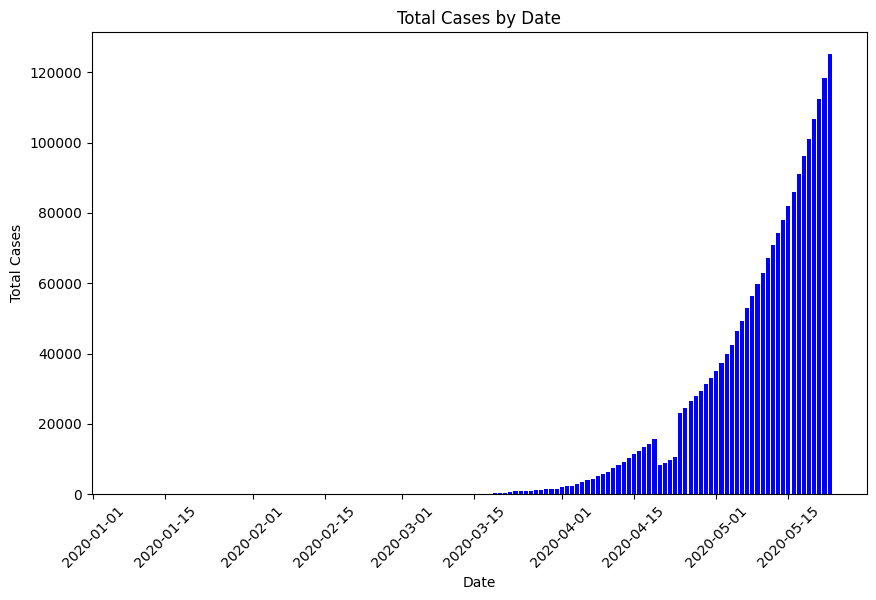

In [31]:
# Bar Chart: Total Cases by Date
plt.figure(figsize=(10, 6))
plt.bar(pdf['date'], pdf['total_cases'], color='blue')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total Cases by Date')
plt.xticks(rotation=45)
plt.show()


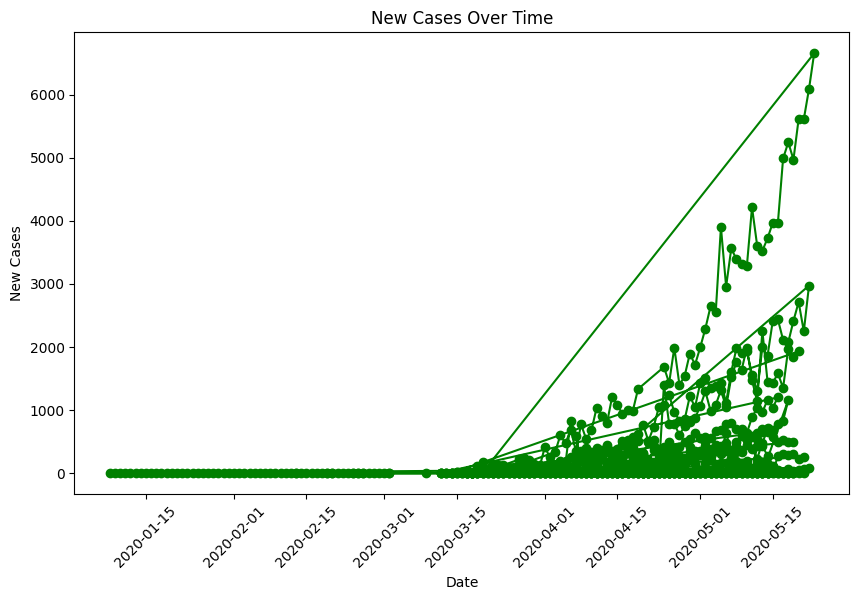

In [32]:
# Line Chart: New Cases Over Time
plt.figure(figsize=(10, 6))
plt.plot(pdf['date'], pdf['new_cases'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('New Cases Over Time')
plt.xticks(rotation=45)
plt.show()


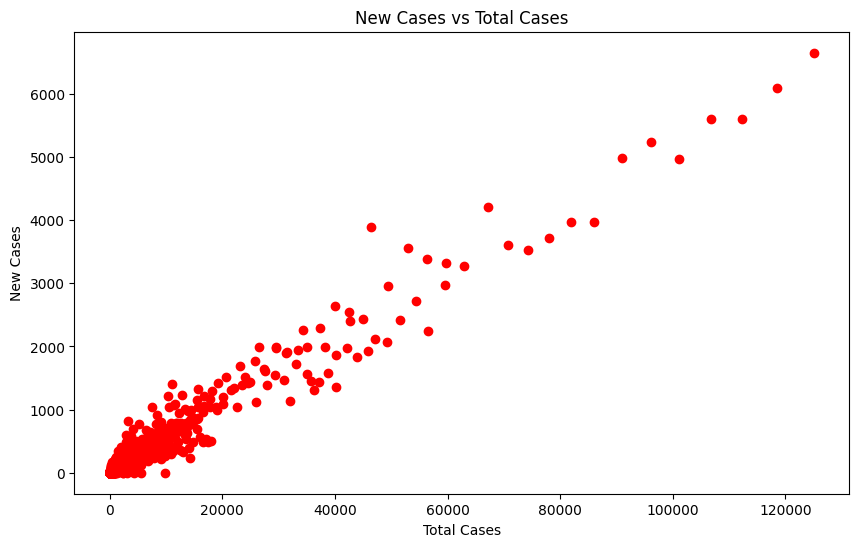

In [37]:
#ScatterPlot: New_Cases vs Total Cases
plt.figure(figsize=(10, 6))
plt.scatter(pdf['total_cases'], pdf['new_cases'], color='red')
plt.xlabel('Total Cases')
plt.ylabel('New Cases')
plt.title('New Cases vs Total Cases')
plt.show()


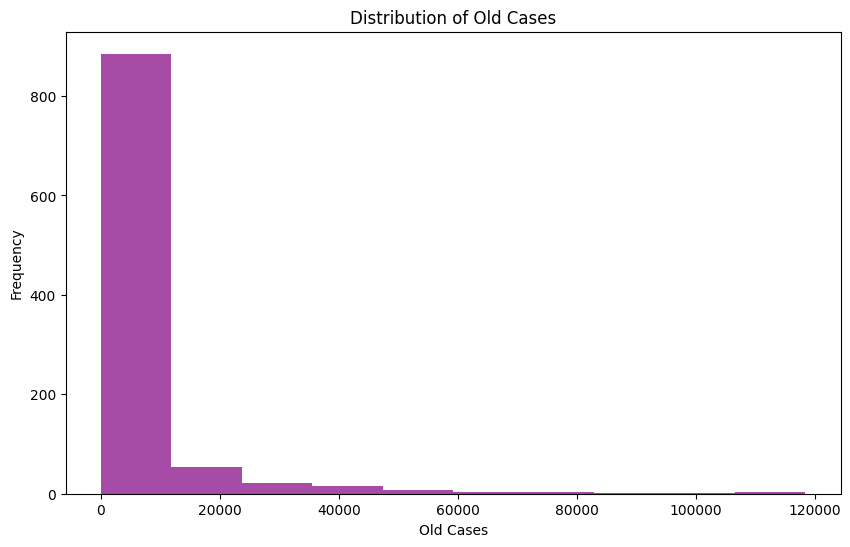

In [41]:
# Histogram: Distribution of Old Cases Per Million
plt.figure(figsize=(10, 6))
plt.hist(pdf['old_cases'], bins=10, color='purple', alpha=0.7)
plt.xlabel('Old Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Old Cases')
plt.show()